# Price Optimization: Case Study
![Price Optimization](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ0Bx9m9Xsddc70y3CmSZ6Fi-rratb9Yhq05DoJtIF0c4ZLhvnicU5LmsL-avFVunWSL1s&usqp=CAU)


# Problem 
The goal is to develop a dynamic pricing model that optimizes the prices of items to maximize revenue while remaining competitive in the market. This involves:

- **Analyzing** the current pricing strategy and its impact on sales and revenue.
- **Comparing** our pricing strategy with that of the competition to identify gaps and opportunities.
- **Developing** a dynamic pricing model that adjusts prices based on factors such as competitor pricing, demand elasticity, and market trends.
- **Implementing and simulating** the dynamic pricing model to compare its performance against the existing pricing strategy.


# Understanding the dataset

In [1]:
import pandas as pd
df = pd.read_csv("Competition_Data.csv")
df.head()

Index Fiscal_Week_ID   Store_ID   Item_ID   Price  Item_Quantity  \
0      0        2019-11  store_459  item_526  134.49            435   
1      1        2019-11  store_459  item_526  134.49            435   
2      2        2019-11  store_459  item_526  134.49            435   
3      3        2019-11  store_459  item_526  134.49            435   
4      4        2019-11  store_459  item_526  134.49            435   

   Sales_Amount_No_Discount  Sales_Amount  Competition_Price  
0                   4716.74      11272.59             206.44  
1                   4716.74      11272.59             158.01  
2                   4716.74      11272.59             278.03  
3                   4716.74      11272.59             222.66  
4                   4716.74      11272.59             195.32

The given dataset contains pricing information for various items sold at a retail store and their corresponding prices at competing stores. The dataset includes the following columns:

- **Fiscal_Week_Id:** The fiscal week identifier.
- **Store_Id:** The store identifier.
- **Item_Id:** The item identifier.
- **Price:** The price of the item at our store.
- **Item_Quantity:** The quantity of the item sold.
- **Sales_Amount_No_Discount:** Sales amount without discount.
- **Sales_Amount:** Sales amount after discounts.
- **Competition_Price:** The price of the item at a competing store.

The data spans multiple fiscal weeks and includes various items across different categories, providing a comprehensive view of pricing strategies and sales performance.

# Inspecting the dataset

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Index                     100000 non-null  int64  
 1   Fiscal_Week_ID            100000 non-null  object 
 2   Store_ID                  100000 non-null  object 
 3   Item_ID                   100000 non-null  object 
 4   Price                     100000 non-null  float64
 5   Item_Quantity             100000 non-null  int64  
 6   Sales_Amount_No_Discount  100000 non-null  float64
 7   Sales_Amount              100000 non-null  float64
 8   Competition_Price         100000 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 6.9+ MB


In [3]:
df.isnull().sum()

Index                       0
Fiscal_Week_ID              0
Store_ID                    0
Item_ID                     0
Price                       0
Item_Quantity               0
Sales_Amount_No_Discount    0
Sales_Amount                0
Competition_Price           0
dtype: int64

In [4]:
df.duplicated().sum()

0

# Statical Overview of the dataset

In [5]:
df.describe()

Index          Price  Item_Quantity  Sales_Amount_No_Discount  \
count  100000.000000  100000.000000  100000.000000             100000.000000   
mean    49999.500000     167.017783     399.611320               4771.147859   
std     28867.657797      69.503418      59.440567               1524.737540   
min         0.000000      47.700000     285.000000               2003.700000   
25%     24999.750000     105.410000     348.000000               3481.460000   
50%     49999.500000     159.420000     401.000000               4746.530000   
75%     74999.250000     221.900000     451.000000               6045.477500   
max     99999.000000     310.660000     522.000000               7853.810000   

        Sales_Amount  Competition_Price  
count  100000.000000      100000.000000  
mean    11396.865217         174.280887  
std      2091.246764          71.545584  
min      7613.560000          47.950000  
25%      9551.590000         118.627500  
50%     11240.020000         162.510000  
75%     13175.230000         237.335000  
max     15685.080000         313.640000

- **Price:** The average price is 167.02, with a wide range from 47.70 to 310.66, indicating price variability.
- **Item Quantity:** On average, around 399.61 items are sold per transaction.
- **Sales Amount:** The sales amounts vary significantly, with a standard deviation of 2091.25. The presence of "Sales Amount No Discount" suggests discounts play a role in the final sales figures.
- **Competition Price:** The average competitor price is 174.28, slightly higher than the average price in the dataset. This could indicate a competitive market.


In [6]:
df = df.sort_values(by='Fiscal_Week_ID')

In [7]:
# 1. Price Difference with Competitors
df['Price_Difference'] = df['Price'] - df['Competition_Price']

# 2. Moving Average of Sales (for a 4-week window)
df['Moving_Avg_Sales'] = df['Sales_Amount'].rolling(window=4, min_periods=1).mean()

In [8]:
df.head()

Index Fiscal_Week_ID   Store_ID   Item_ID   Price  Item_Quantity  \
0          0        2019-11  store_459  item_526  134.49            435   
13077  13077        2019-11  store_594  item_605  212.81            345   
13076  13076        2019-11  store_594  item_605  212.81            345   
13075  13075        2019-11  store_594  item_605  212.81            345   
13074  13074        2019-11  store_594  item_605  212.81            345   

       Sales_Amount_No_Discount  Sales_Amount  Competition_Price  \
0                       4716.74      11272.59             206.44   
13077                   3961.33       9251.48             197.69   
13076                   3961.33       9251.48             231.52   
13075                   3961.33       9251.48             134.07   
13074                   3961.33       9251.48              94.43   

       Price_Difference  Moving_Avg_Sales  
0                -71.95      11272.590000  
13077             15.12      10262.035000  
13076            -18.71       9925.183333  
13075             78.74       9756.757500  
13074            118.38       9251.480000

# Detecting and Removing Outliers Using IOR 

In [9]:
# Specify the columns where I want to remove outliers
columns_to_check = ['Price', 'Item_Quantity', 'Sales_Amount']

# Counting the number of rows before removing outliers
initial_count = len(df)

# Defining a function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for column in columns_to_check:
    df = remove_outliers_iqr(df, column)

# Countint the number of rows after removing outliers
final_count = len(df)

# Calculating the total number of outliers removed
outliers_removed = initial_count - final_count

print(f'Total outliers removed: {outliers_removed}')

Total outliers removed: 0


# Exploraory data Analysis (EDA)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

## Price Distribution Analysis

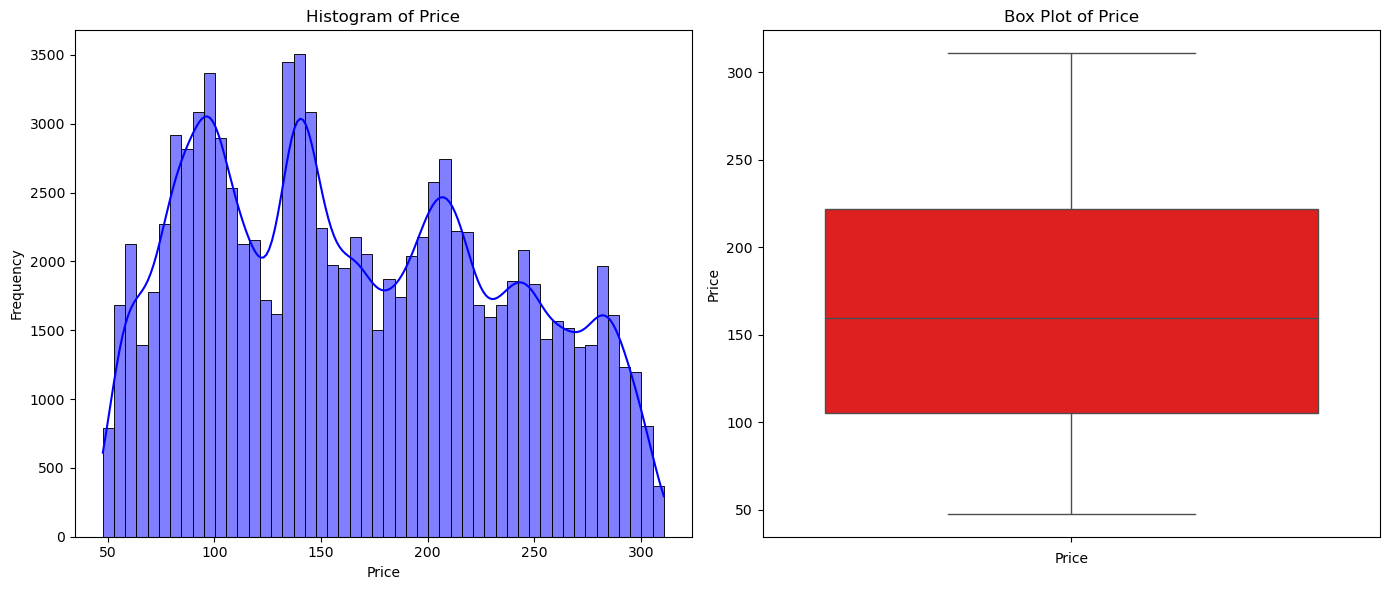

In [11]:
plt.figure(figsize=(14, 6))

# Histogram for Price
plt.subplot(1, 2, 1)
sns.histplot(df['Price'], bins=50, kde=True, color='blue')
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Box plot for Price
plt.subplot(1, 2, 2)
sns.boxplot(df['Price'], color='red')
plt.title('Box Plot of Price')
plt.xlabel('Price')

plt.tight_layout()
plt.show()


- The price distribution is approximately normal, centered around 150 (median), indicating a focus on a mid-range price point.
- The interquartile range (IQR) reveals that 50% of prices fall between ~105 and ~220, suggesting moderate price variability.
- The absence of outliers signifies a consistent pricing strategy without extreme variations.
- This pricin structure liely targets a broad customer base while allowing for potential upselling opportunites.

## Item Quantity Analysis

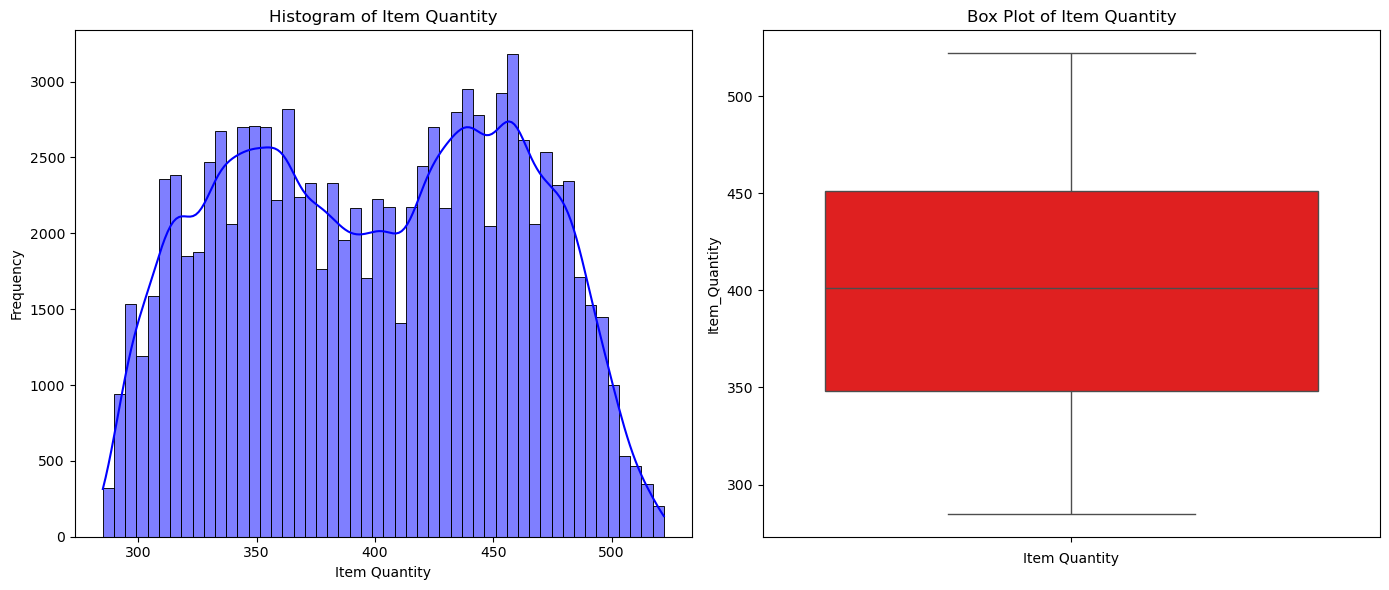

In [12]:

plt.figure(figsize=(14, 6))

# Histogram for Item Quantity
plt.subplot(1, 2, 1)
sns.histplot(df['Item_Quantity'], bins=50, kde=True, color='blue')
plt.title('Histogram of Item Quantity')
plt.xlabel('Item Quantity')
plt.ylabel('Frequency')

# Box plot for Item Quantity
plt.subplot(1, 2, 2)
sns.boxplot(df['Item_Quantity'], color='red')
plt.title('Box Plot of Item Quantity')
plt.xlabel('Item Quantity')

plt.tight_layout()
plt.show()


- The item quantity distribution is approximately normal, centered around 400 (median), suggesting a typical order size for most customers.
- The interquartile range (IQR) reveals that 50% of orders fall between ~350 and ~450 items, indicating moderate variability in order quantities.
- The absence of outliers signifies a consistent demand pattern without extreme fluctuations in order sizes.
- Item quantities follow a predictable normal distribution, centered at 400 with moderate variability, aiding inventory and sales planning.A


## Sales Distribution Analysis

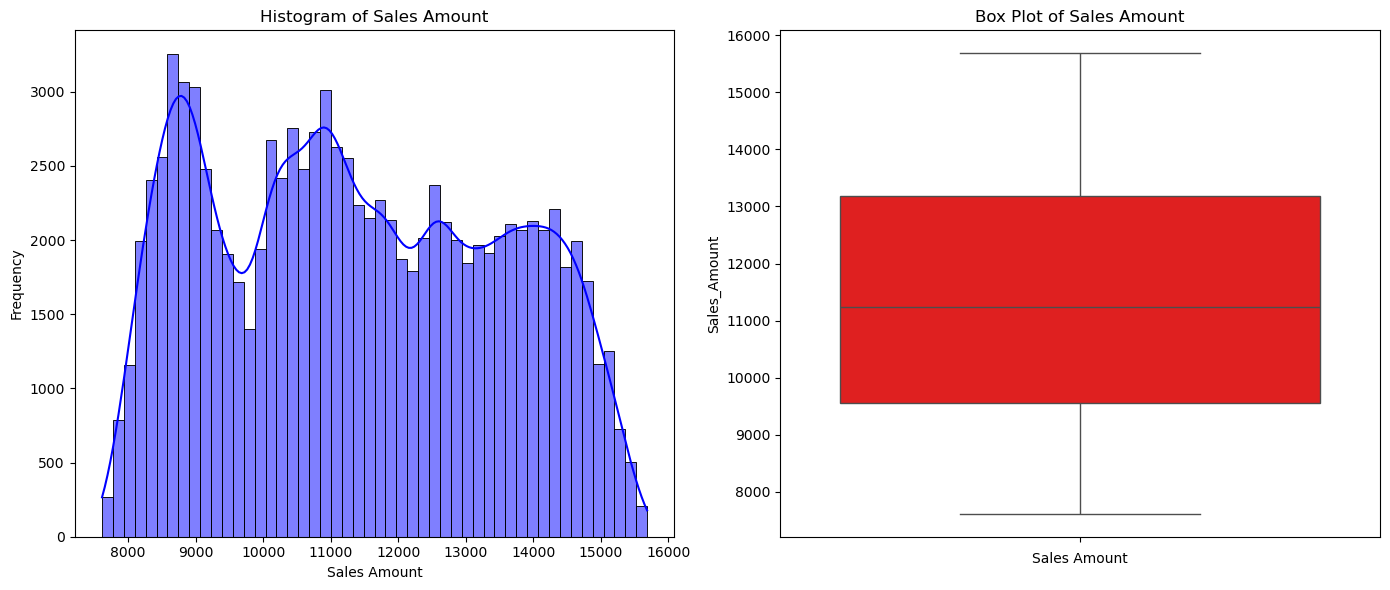

In [13]:
plt.figure(figsize=(14, 6))

# Histogram for Sales Amount
plt.subplot(1, 2, 1)
sns.histplot(df['Sales_Amount'], bins=50, kde=True, color='blue')
plt.title('Histogram of Sales Amount')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')

# Box plot for Sales Amount
plt.subplot(1, 2, 2)
sns.boxplot(df['Sales_Amount'], color='red')
plt.title('Box Plot of Sales Amount')
plt.xlabel('Sales Amount')

plt.tight_layout()
plt.show()


- Sales amounts exhibit a normal distribution centered around 11,500, suggesting a typical transaction value.
- 50% of sales fall within a range of 9,500 to 13,500, indicating some fluctuation in sales figures.
- The absence of outliers implies a stable sales pattern without extreme highs or lows.
- The data indicates consistent sales performance, facilitating accurate revenue forecasting and strategic financial planning.


## Sales Comparision Store

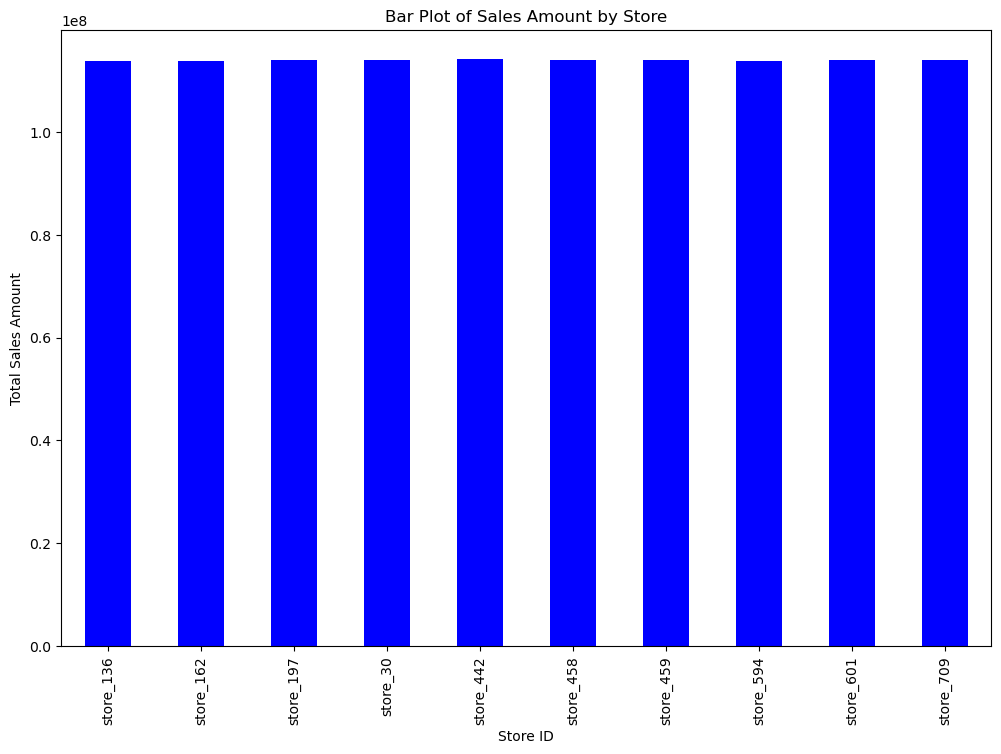

In [14]:
plt.figure(figsize=(12, 8))
df.groupby('Store_ID')['Sales_Amount'].sum().plot(kind='bar', color='Blue')
plt.title('Bar Plot of Sales Amount by Store')
plt.xlabel('Store ID')
plt.ylabel('Total Sales Amount')
plt.show()

All the 10 stores exhibit remarkably uniform sales, each generating ~110 million, suggesting standardized operations or offerings.

## Sales Amount comparion by items

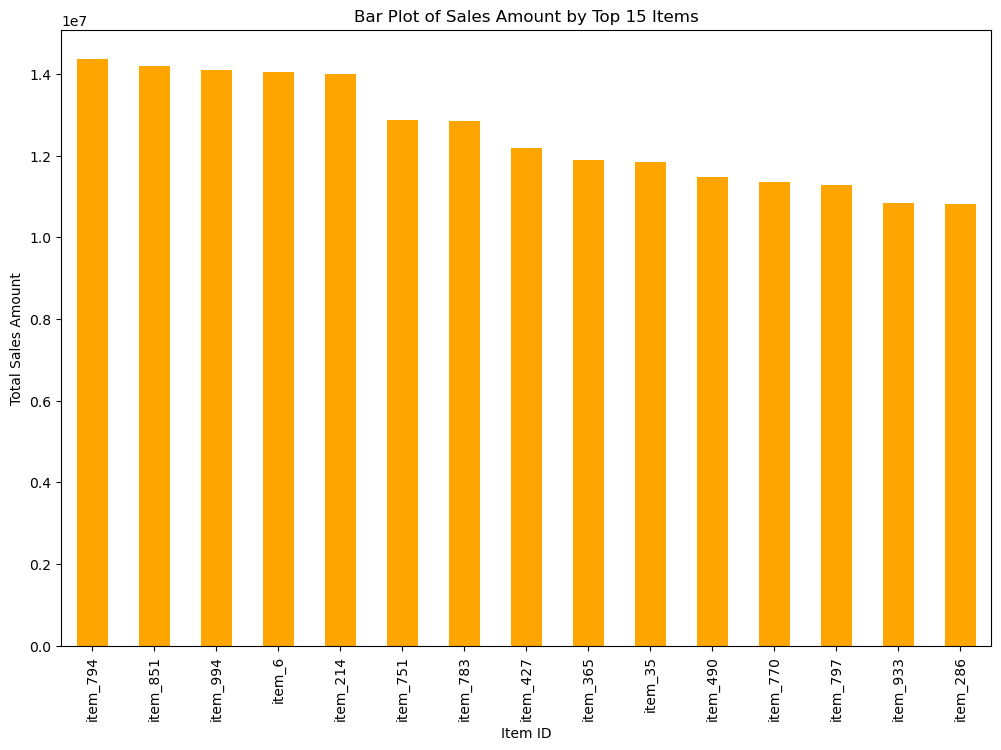

In [15]:
plt.figure(figsize=(12, 8))
top_15_items = df.groupby('Item_ID')['Sales_Amount'].sum().nlargest(15)
top_15_items.plot(kind='bar', color='orange')
plt.title('Bar Plot of Sales Amount by Top 15 Items')
plt.xlabel('Item ID')
plt.ylabel('Total Sales Amount')
plt.show()

This pattern suggests a strong reliance on a few key products, highlighting their importance for revenue generation. The gradual decline indicates potential opportunities for targeted marketing or product improvement initiatives to boost sales for lower-performing items.

## Sales Amount comparion by weeks

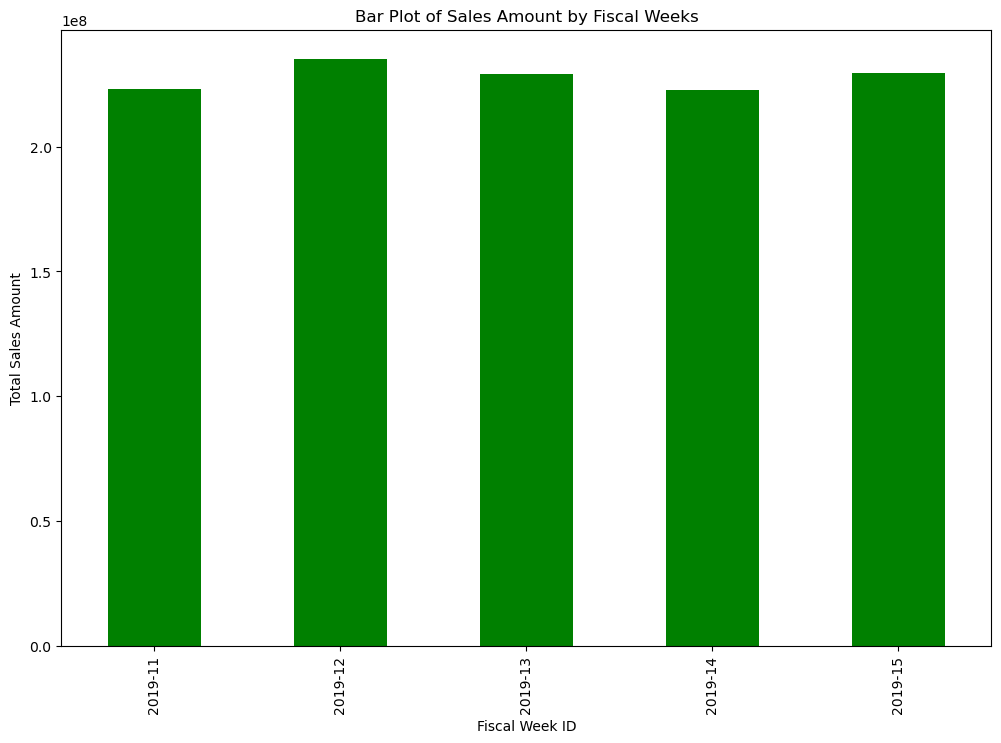

In [16]:
# Calculate the total sales amount for each fiscal week
weekly_sales = df.groupby('Fiscal_Week_ID')['Sales_Amount'].sum()
plt.figure(figsize=(12, 8))
weekly_sales.plot(kind='bar', color='green')
plt.title('Bar Plot of Sales Amount by Fiscal Weeks')
plt.xlabel('Fiscal Week ID')
plt.ylabel('Total Sales Amount')
plt.show()


 The bar chart showcases a consistent total sales amount of approximately 220 million across the five fiscal weeks from 2019-11 to 2019-15.

## Visualizing Sales Distribution by Price and Quantity

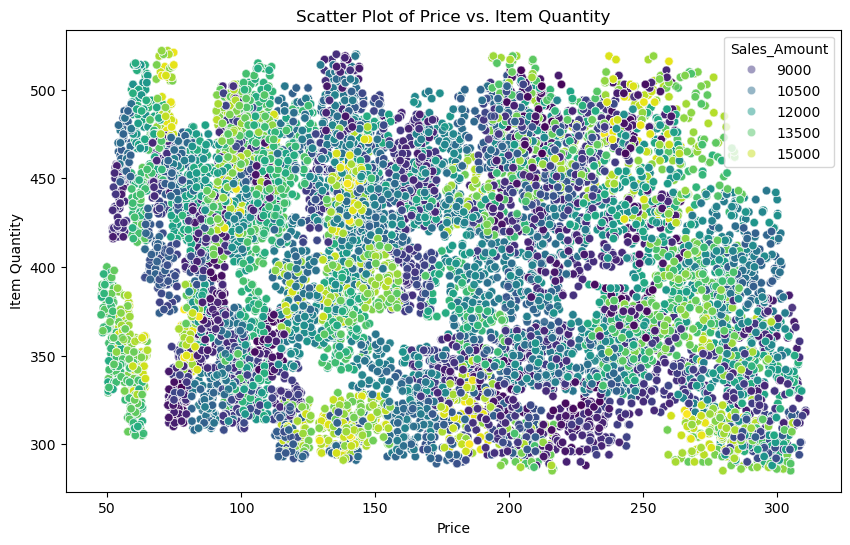

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Item_Quantity', data=df, color='blue', alpha=0.5, hue='Sales_Amount', palette='viridis')
plt.title('Scatter Plot of Price vs. Item Quantity')
plt.xlabel('Price')
plt.ylabel('Item Quantity')
plt.show()


- Most sales occur with item quantities between 300 and 450, and prices between 100 and 200.
- Transactions with higher sales amounts (represented by lighter colors) tend to cluster within this central price and quantity range.

# Compitetor Anlysis

## Price vs. Competitor Price Scatter Plot

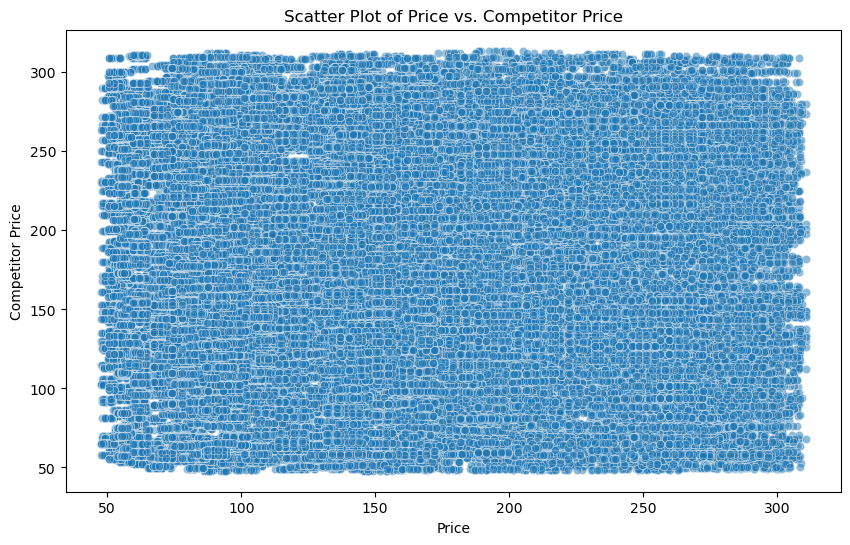

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Competition_Price', data=df, alpha=0.5)
plt.title('Scatter Plot of Price vs. Competitor Price')
plt.xlabel('Price')
plt.ylabel('Competitor Price')
plt.show()


- Prices and competitor prices exhibit a dense cluster, primarily between 100 and 250, indicating a competitive market with limited price differentiation.
- Some points overlap, indicating instances where prices are identical to competitor prices.

## Top 10 Items: Price vs. Competitor Price

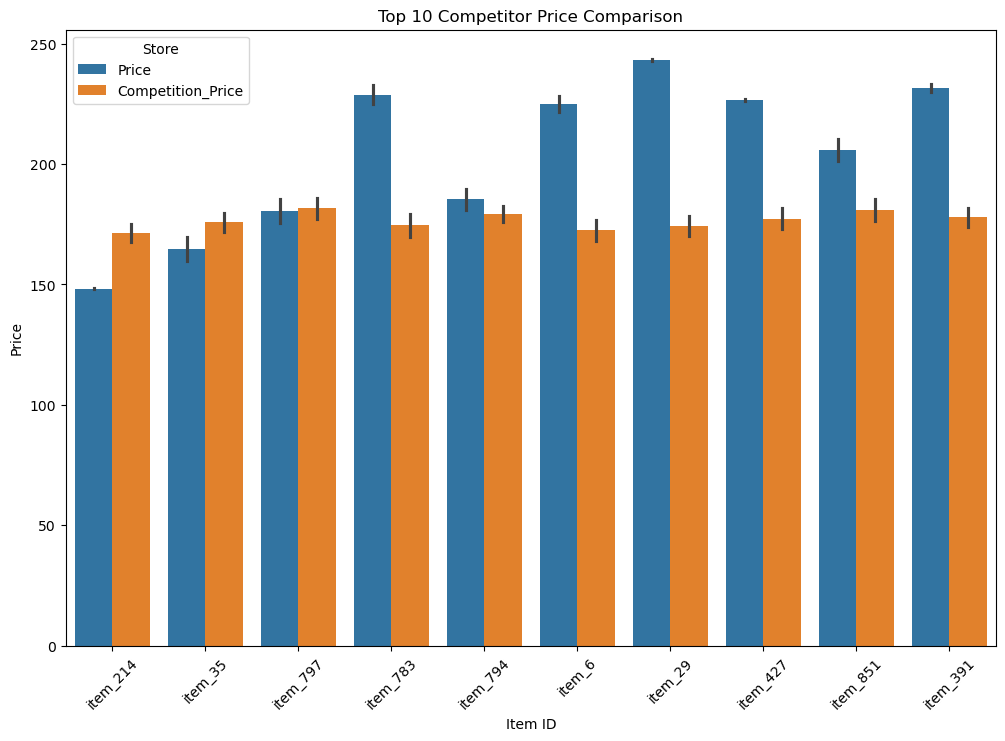

In [32]:
plt.figure(figsize=(12, 8))

# Calculate the sum of Store_Price for each Item_ID
df_melt = pd.melt(df[['Item_ID', 'Price', 'Competition_Price']], 
                  id_vars='Item_ID', 
                  value_vars=['Price', 'Competition_Price'], 
                  var_name='Store', 
                  value_name='Store_Price')

# Calculate total price per item and get top 10 items
top_items = df_melt.groupby('Item_ID')['Store_Price'].sum().nlargest(10).index

# Filter for top 10 items
df_top_items = df_melt[df_melt['Item_ID'].isin(top_items)]

# Bar plot comparing your store's price with competitors for each item
sns.barplot(x='Item_ID', y='Store_Price', hue='Store', data=df_top_items)
plt.title('Top 10 Competitor Price Comparison')
plt.xlabel('Item ID')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

- Across most of the top 10 items, our prices are very close to competitor prices, indicating a highly competitive market.
- For a few items, our prices are slightly lower, potentially offering a competitive edge.
- In some cases, competitor prices are noticeably lower, warranting further investigation into product differentiation or cost structures.

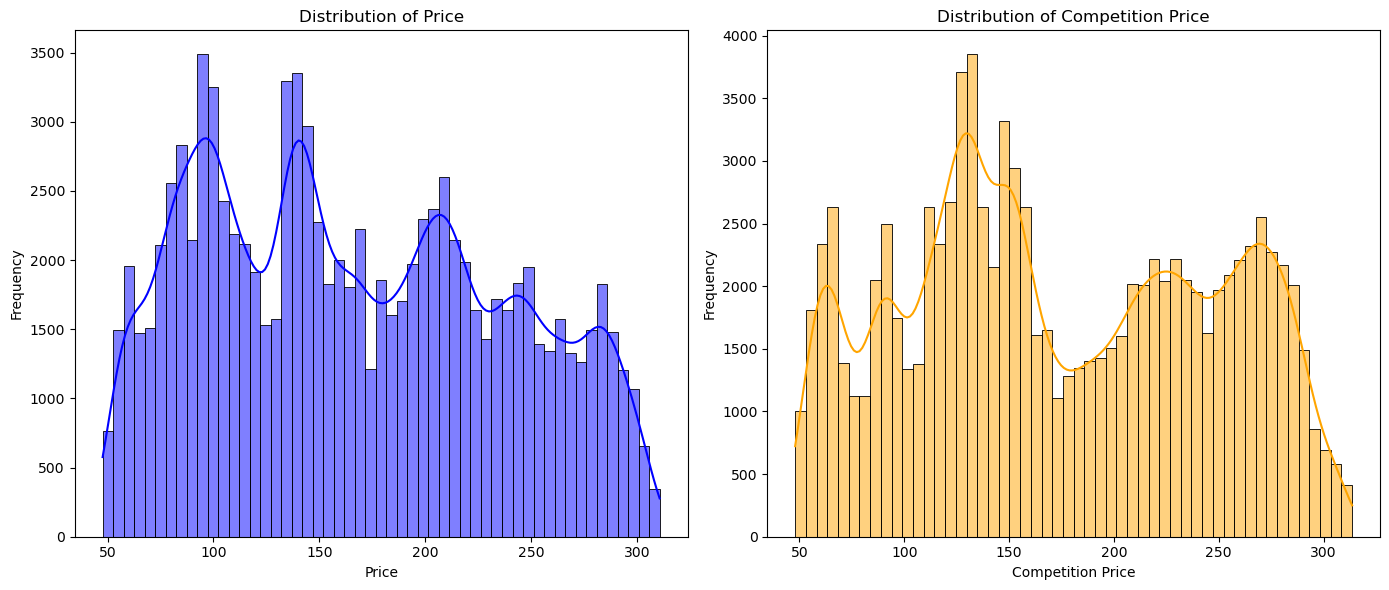

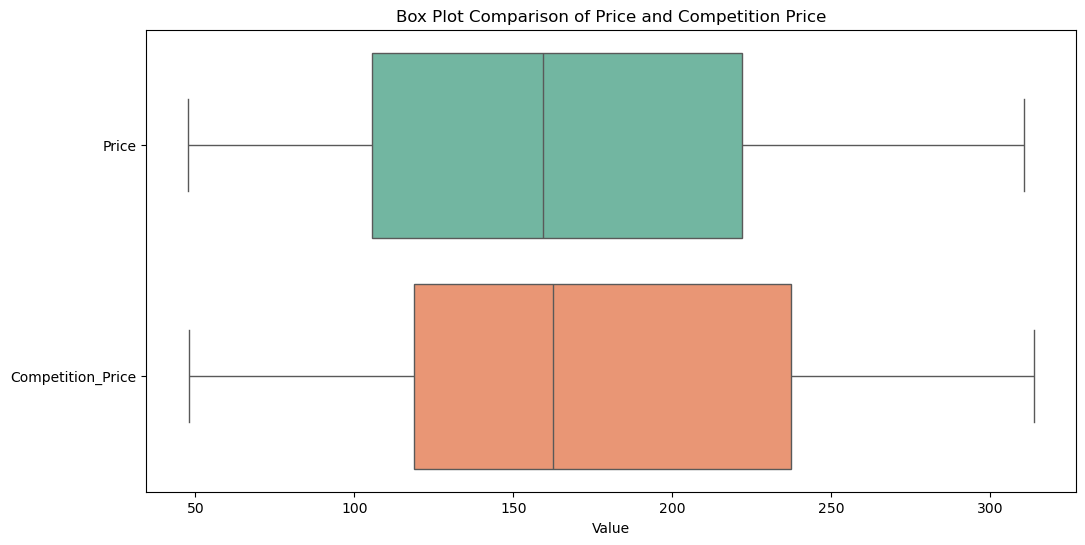

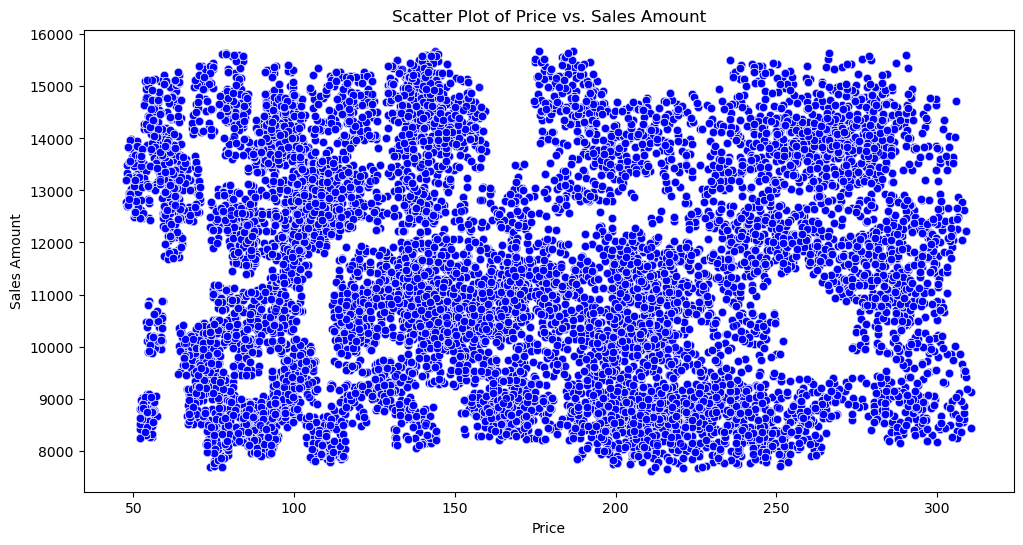

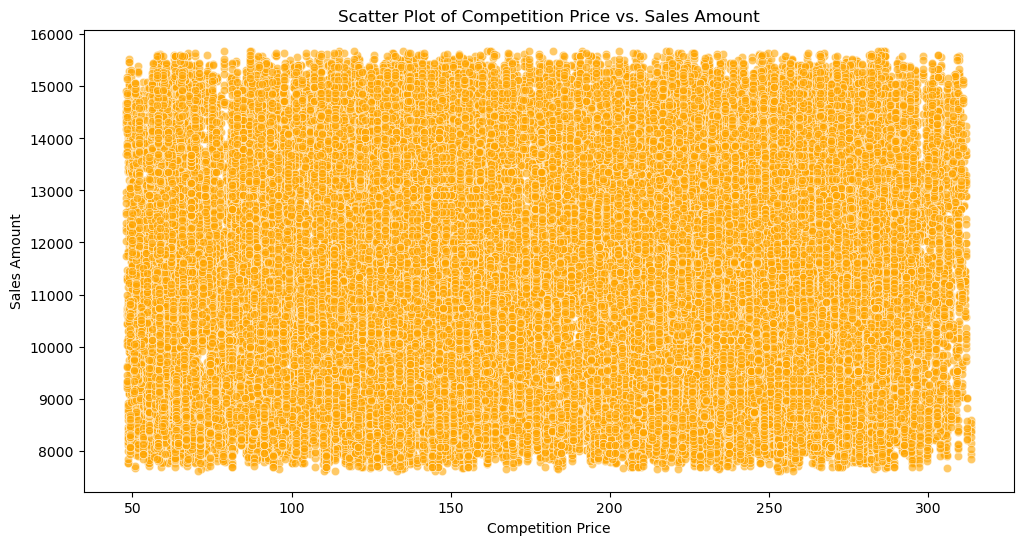

In [19]:
# Plotting Histograms for Price and Competition_Price
plt.figure(figsize=(14, 6))

# Histogram for Price
plt.subplot(1, 2, 1)
sns.histplot(df['Price'], kde=True, color='blue')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Histogram for Competition_Price
plt.subplot(1, 2, 2)
sns.histplot(df['Competition_Price'], kde=True, color='orange')
plt.title('Distribution of Competition Price')
plt.xlabel('Competition Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Box Plot Comparisons
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Price', 'Competition_Price']], orient='h', palette='Set2')
plt.title('Box Plot Comparison of Price and Competition Price')
plt.xlabel('Value')
plt.show()

# Scatter Plot: Price vs. Sales_Amount
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Price', y='Sales_Amount', data=df, color='blue', alpha=0.6)
plt.title('Scatter Plot of Price vs. Sales Amount')
plt.xlabel('Price')
plt.ylabel('Sales Amount')
plt.show()

# Scatter Plot: Competition_Price vs. Sales_Amount
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Competition_Price', y='Sales_Amount', data=df, color='orange', alpha=0.6)
plt.title('Scatter Plot of Competition Price vs. Sales Amount')
plt.xlabel('Competition Price')
plt.ylabel('Sales Amount')
plt.show()

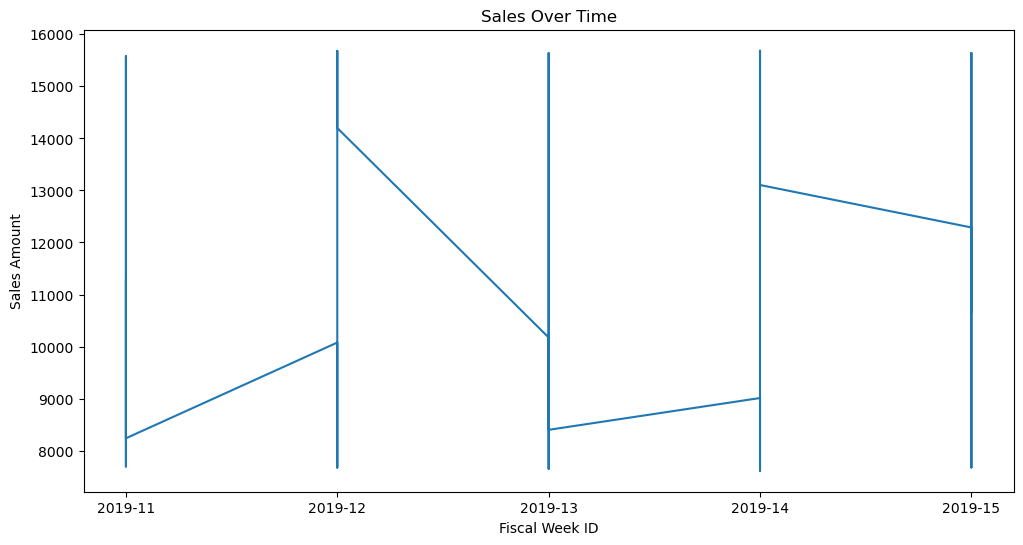

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Fiscal_Week_ID'], df['Sales_Amount'], label='Sales Amount')
plt.title('Sales Over Time')
plt.xlabel('Fiscal Week ID')
plt.ylabel('Sales Amount')
plt.show()


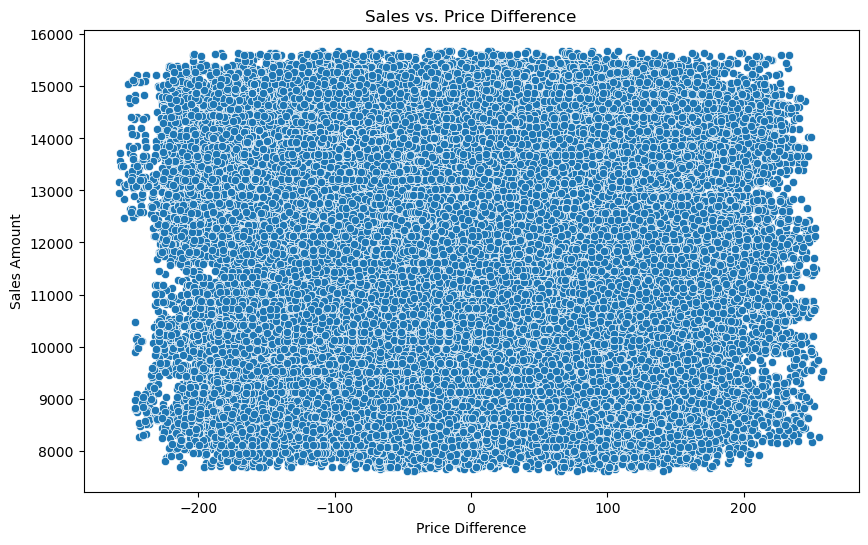

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price_Difference', y='Sales_Amount', data=df)
plt.title('Sales vs. Price Difference')
plt.xlabel('Price Difference')
plt.ylabel('Sales Amount')
plt.show()


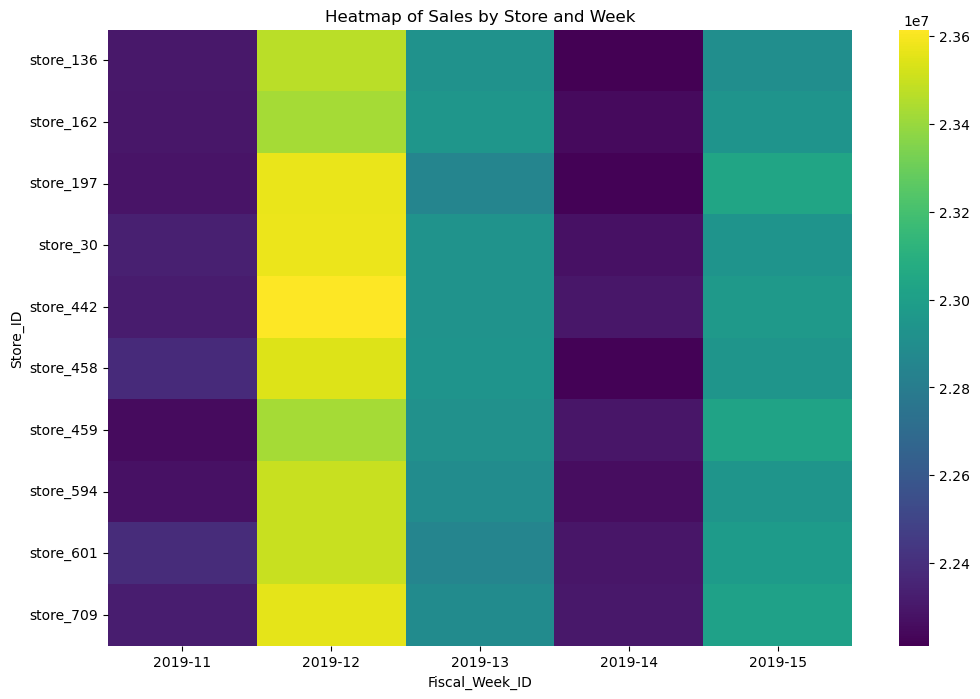

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a pivot table for the heatmap
heatmap_data = df.pivot_table(index='Store_ID', columns='Fiscal_Week_ID', values='Sales_Amount', aggfunc='sum', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis')
plt.title('Heatmap of Sales by Store and Week')
plt.show()


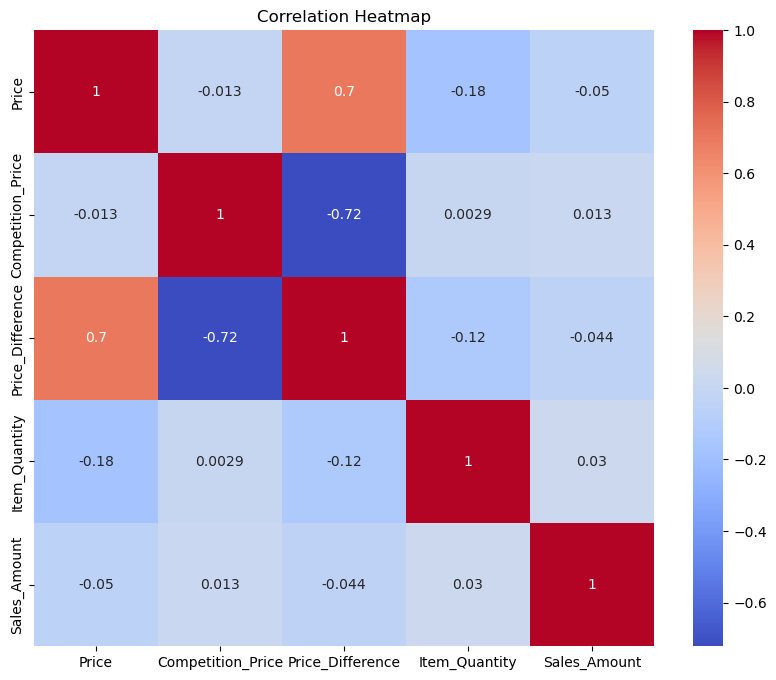

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
correlation_matrix = df[['Price', 'Competition_Price', 'Price_Difference', 'Item_Quantity', 'Sales_Amount']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


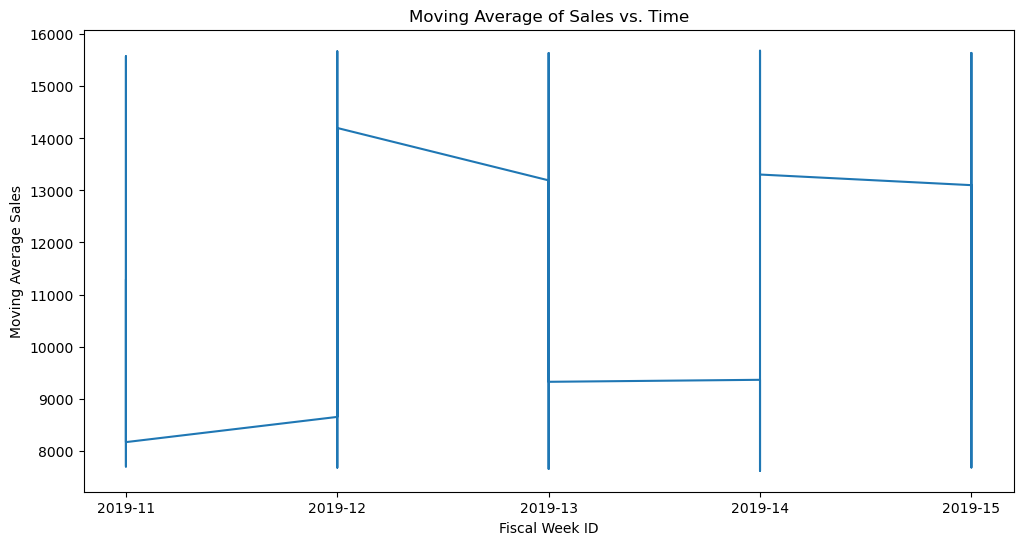

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Fiscal_Week_ID'], df['Moving_Avg_Sales'], label='Moving Average Sales')
plt.title('Moving Average of Sales vs. Time')
plt.xlabel('Fiscal Week ID')
plt.ylabel('Moving Average Sales')
plt.show()


In [25]:
df.head()

Index Fiscal_Week_ID   Store_ID   Item_ID   Price  Item_Quantity  \
0          0        2019-11  store_459  item_526  134.49            435   
13077  13077        2019-11  store_594  item_605  212.81            345   
13076  13076        2019-11  store_594  item_605  212.81            345   
13075  13075        2019-11  store_594  item_605  212.81            345   
13074  13074        2019-11  store_594  item_605  212.81            345   

       Sales_Amount_No_Discount  Sales_Amount  Competition_Price  \
0                       4716.74      11272.59             206.44   
13077                   3961.33       9251.48             197.69   
13076                   3961.33       9251.48             231.52   
13075                   3961.33       9251.48             134.07   
13074                   3961.33       9251.48              94.43   

       Price_Difference  Moving_Avg_Sales  
0                -71.95      11272.590000  
13077             15.12      10262.035000  
13076            -18.71       9925.183333  
13075             78.74       9756.757500  
13074            118.38       9251.480000

Fiscal_Week_ID     2019-11     2019-12     2019-13     2019-14     2019-15
count           176.000000  176.000000  176.000000  176.000000  176.000000
mean              0.002762    0.217159    0.188421   -0.127685   -0.108702
std               3.908304    7.498429    7.057994    5.413067   11.576945
min             -18.597289  -47.475274  -64.516714  -30.263627  -61.043928
25%              -0.933778   -0.847534   -0.745106   -1.144257   -0.728102
50%               0.128828   -0.055802    0.188713    0.128707   -0.099897
75%               0.795140    1.240111    1.202499    1.166597    0.957760
max              14.468225   37.788555   22.092622   22.709408  127.385621


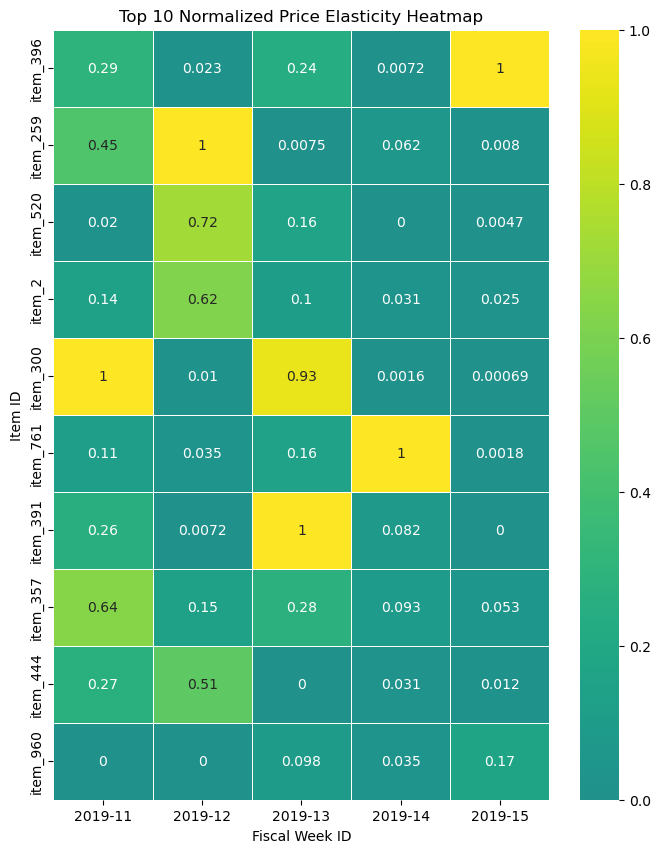

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming `df` is already defined and contains the relevant data

# Calculate percentage change and price elasticity
df['Price_Change'] = df.groupby('Item_ID')['Price'].pct_change()
df['Quantity_Change'] = df.groupby('Item_ID')['Item_Quantity'].pct_change()
df['Elasticity'] = df['Quantity_Change'] / df['Price_Change']
df_clean = df.dropna(subset=['Elasticity'])

# Aggregate and pivot
df_aggregated = df_clean.groupby(['Item_ID', 'Fiscal_Week_ID']).agg({'Elasticity': 'mean'}).reset_index()
elasticity_df = df_aggregated.pivot(index='Item_ID', columns='Fiscal_Week_ID', values='Elasticity')

# Check for and handle infinity values
elasticity_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Handle NaN values: Replace with 0 or use a different strategy
elasticity_df.fillna(0, inplace=True)

# Check for extremely large values
print(elasticity_df.describe())

# Select top 10 items based on the mean elasticity across weeks
top_10_items = elasticity_df.mean(axis=1).nlargest(10).index
elasticity_df_top10 = elasticity_df.loc[top_10_items]

# Normalize data if needed
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(elasticity_df_top10)
scaled_df = pd.DataFrame(scaled_data, index=elasticity_df_top10.index, columns=elasticity_df_top10.columns)

# Plot heatmap for top 10 items
plt.figure(figsize=(8, 10))
sns.heatmap(scaled_df, annot=True, cmap='viridis', center=0, linewidths=0.5)
plt.title('Top 10 Normalized Price Elasticity Heatmap')
plt.xlabel('Fiscal Week ID')
plt.ylabel('Item ID')
plt.show()

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame `df` with columns 'Item_ID', 'Elasticity'

# Define the segments based on elasticity
def categorize_elasticity(elasticity):
    if elasticity > 1:
        return 'Elastic'
    elif elasticity < 1:
        return 'Inelastic'
    else:
        return 'Unitary Elastic'

# Apply categorization
df['Elasticity_Segment'] = df['Elasticity'].apply(categorize_elasticity)

# Display results to ensure correct segmentation
print(df[['Item_ID', 'Elasticity', 'Elasticity_Segment']].head())

# Check if there are any unitary elastic items
print("Count of each elasticity segment:")
print(df['Elasticity_Segment'].value_counts())

        Item_ID  Elasticity Elasticity_Segment
0      item_526         NaN    Unitary Elastic
13077  item_605         NaN    Unitary Elastic
13076  item_605         NaN    Unitary Elastic
13075  item_605         NaN    Unitary Elastic
13074  item_605         NaN    Unitary Elastic
Count of each elasticity segment:
Elasticity_Segment
Unitary Elastic    75278
Inelastic          18534
Elastic             6188
Name: count, dtype: int64


        Store_ID   Item_ID  Elasticity Elasticity_Segment
0      store_459  item_526         NaN    Unitary Elastic
13077  store_594  item_605         NaN    Unitary Elastic
13076  store_594  item_605         NaN    Unitary Elastic
13075  store_594  item_605         NaN    Unitary Elastic
13074  store_594  item_605         NaN    Unitary Elastic
Elasticity_Segment  Elastic  Inelastic  Unitary Elastic
Store_ID                                               
store_136               648       2005             7347
store_162               614       2035             7351
store_197               506       1485             8009
store_30                693       2004             7303
store_442               627       1965             7408
store_458               669       1967             7364
store_459               420       1359             8221
store_594               713       1838             7449
store_601               683       2029             7288
store_709               615       18

<Figure size 1400x800 with 0 Axes>

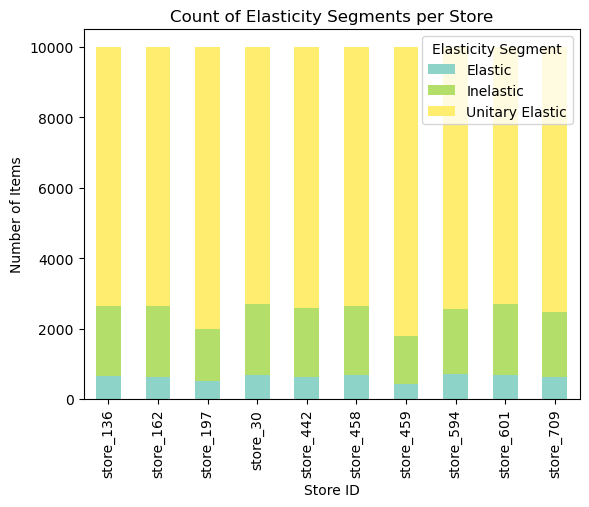

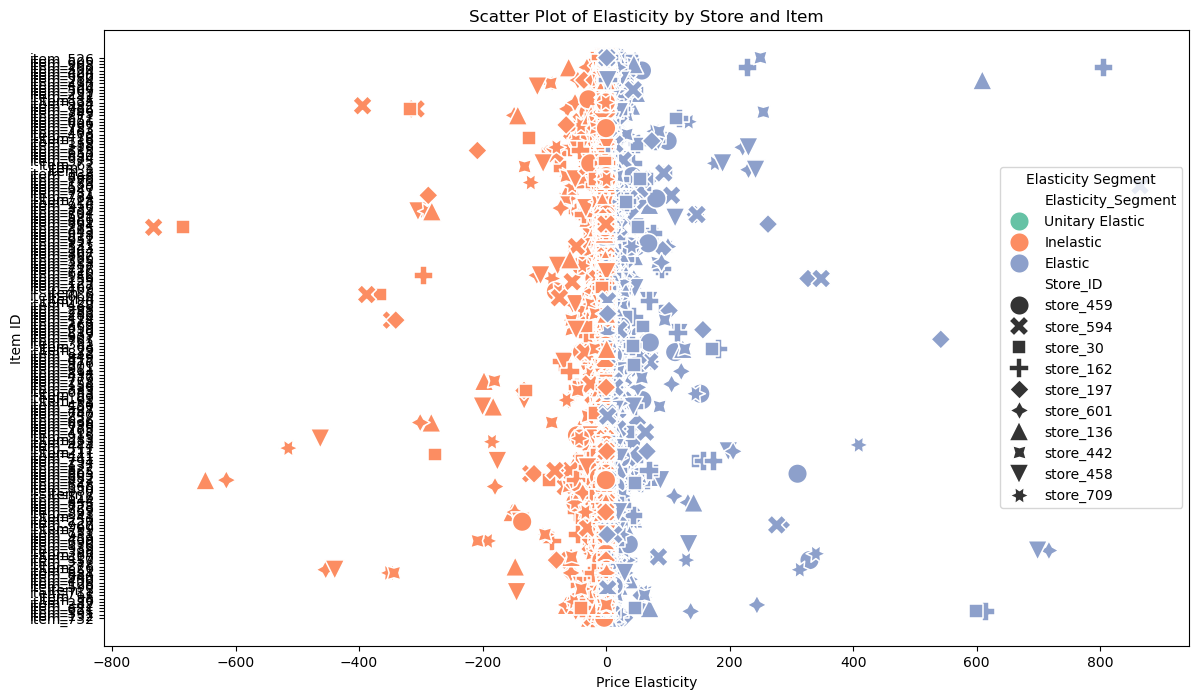

In [29]:
# Apply categorization without groupby, as the function is applied to each elasticity value individually
df['Elasticity_Segment'] = df['Elasticity'].apply(categorize_elasticity)

# Display the categorized data
print(df[['Store_ID', 'Item_ID', 'Elasticity', 'Elasticity_Segment']].head())

# Optional: Summarize the count of each segment per store
segment_summary = df.groupby(['Store_ID', 'Elasticity_Segment']).size().unstack(fill_value=0)
print(segment_summary)

# Visualization 1: Count of Elasticity Segments per Store (Stacked Bar Chart)
plt.figure(figsize=(14, 8))
segment_summary.plot(kind='bar', stacked=True, colormap='Set3')
plt.title('Count of Elasticity Segments per Store')
plt.xlabel('Store ID')
plt.ylabel('Number of Items')
plt.legend(title='Elasticity Segment')
plt.show()

# Visualization 2: Scatter plot of Elasticity by Store and Item
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='Elasticity', y='Item_ID', hue='Elasticity_Segment', style='Store_ID', palette='Set2', s=200)
plt.title('Scatter Plot of Elasticity by Store and Item')
plt.xlabel('Price Elasticity')
plt.ylabel('Item ID')
plt.legend(title='Elasticity Segment')
plt.show()

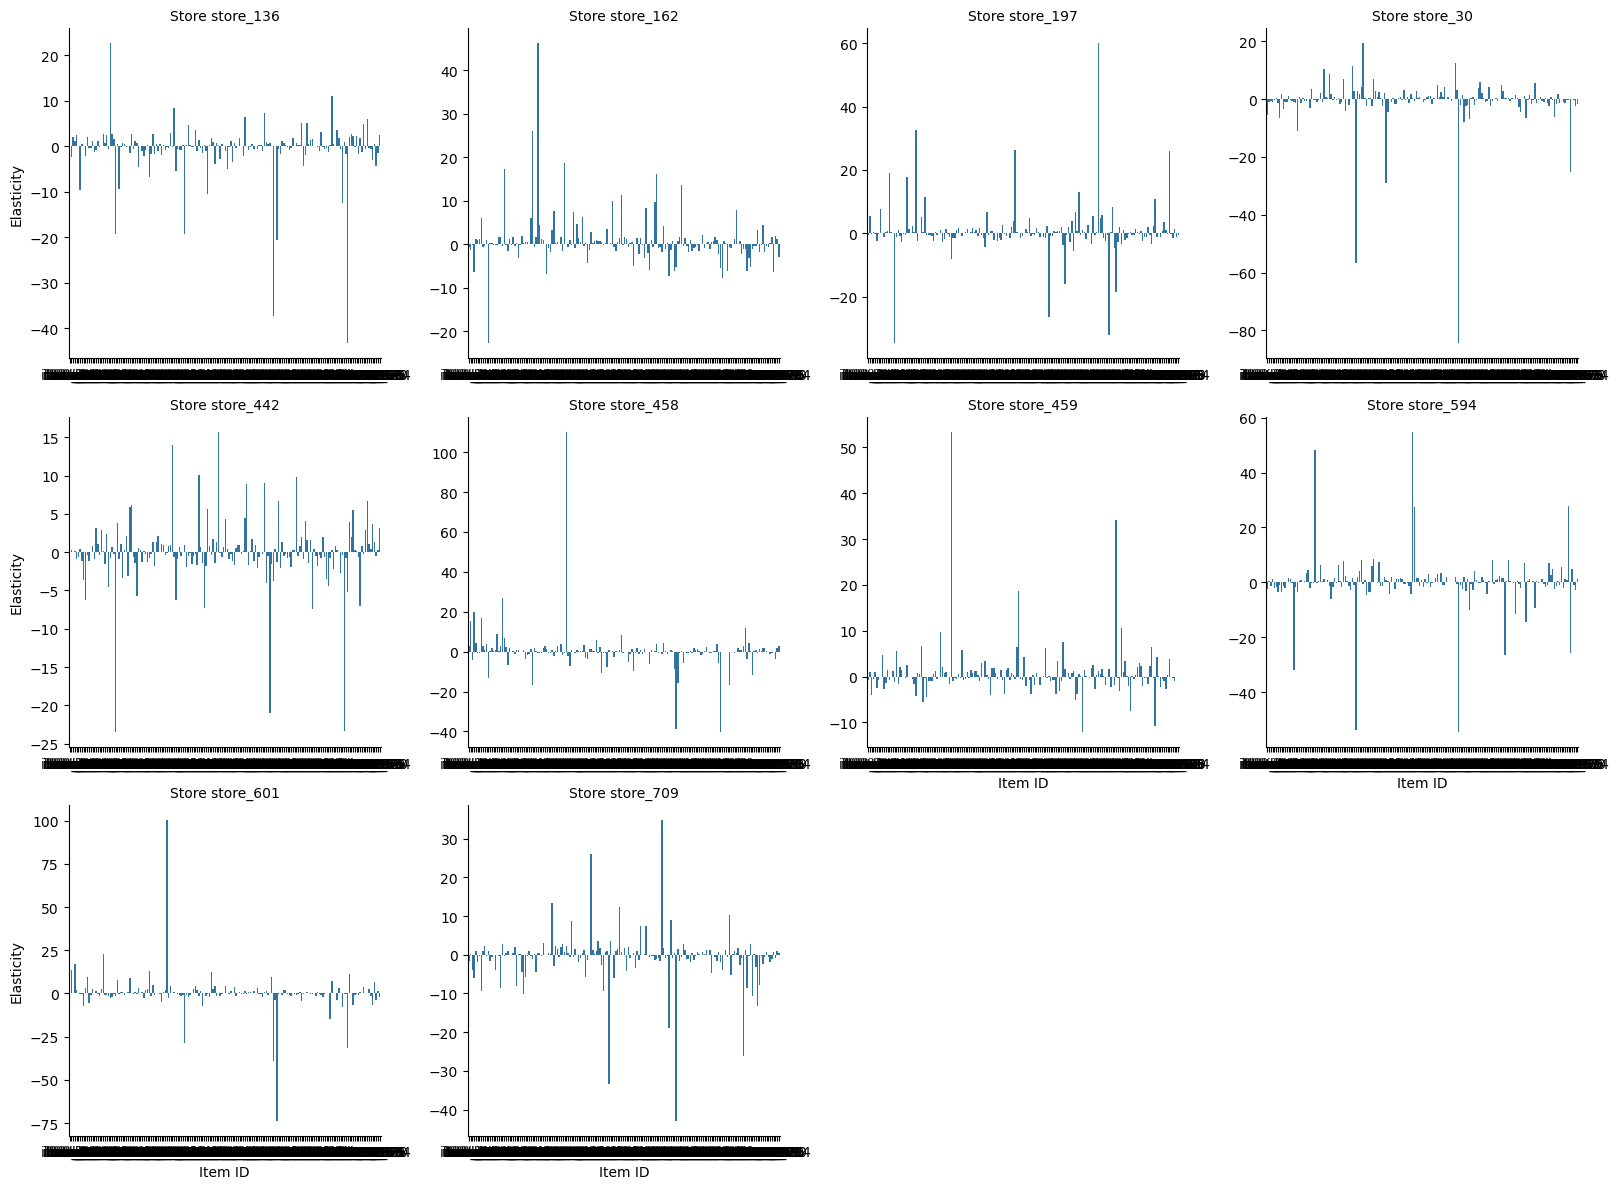

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame `df` with columns 'Store_ID', 'Item_ID', 'Price', 'Item_Quantity'

# Calculate percentage change and price elasticity
df['Price_Change'] = df.groupby('Item_ID')['Price'].pct_change()
df['Quantity_Change'] = df.groupby('Item_ID')['Item_Quantity'].pct_change()
df['Elasticity'] = df['Quantity_Change'] / df['Price_Change']
df_clean = df.dropna(subset=['Elasticity'])

# Aggregate by Store_ID and Item_ID
df_aggregated = df_clean.groupby(['Store_ID', 'Item_ID']).agg({'Elasticity': 'mean'}).reset_index()

# Plot using FacetGrid
g = sns.FacetGrid(df_aggregated, col='Store_ID', col_wrap=4, height=4, sharex=False, sharey=False)
g.map(sns.barplot, 'Item_ID', 'Elasticity', order=df_aggregated['Item_ID'].unique())
g.set_titles(col_template="Store {col_name}")
g.set_axis_labels('Item ID', 'Elasticity')
g.add_legend()
plt.show()


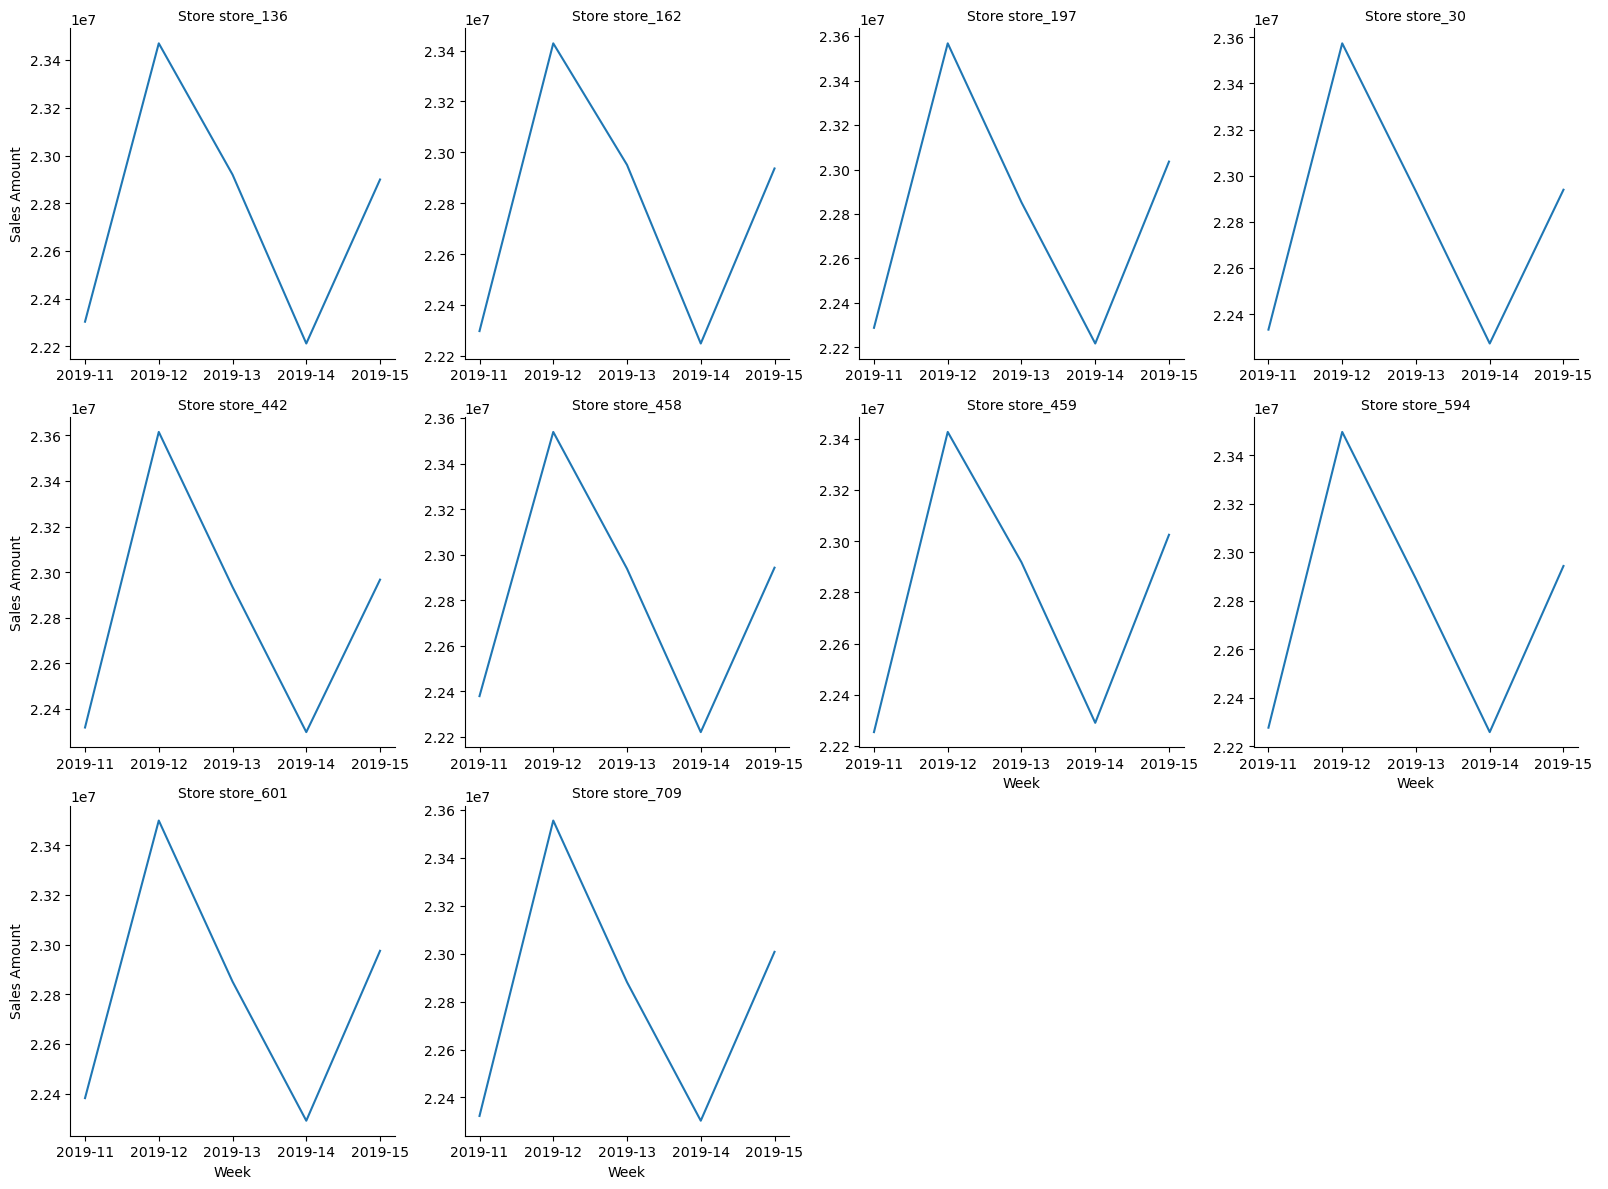

In [31]:
# Assuming 'Fiscal_Week_ID' is already converted to datetime
# Sample DataFrame `df` with columns 'Store_ID', 'Item_ID', 'Fiscal_Week_ID', 'Sales_Amount'

# Aggregate sales by week and store
df_aggregated = df.groupby(['Store_ID', 'Fiscal_Week_ID']).agg({'Sales_Amount': 'sum'}).reset_index()

# Plot using FacetGrid
g = sns.FacetGrid(df_aggregated, col='Store_ID', col_wrap=4, height=4, sharex=False, sharey=False)
g.map(sns.lineplot, 'Fiscal_Week_ID', 'Sales_Amount')
g.set_titles(col_template="Store {col_name}")
g.set_axis_labels('Week', 'Sales Amount')
g.add_legend()
plt.show()
